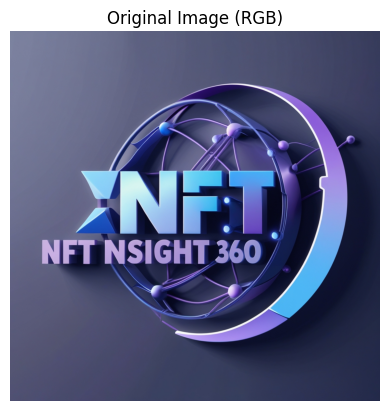

Image Size: 1120x1120
Total Pixels: 1254400


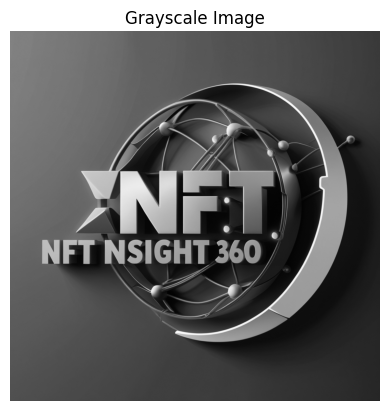

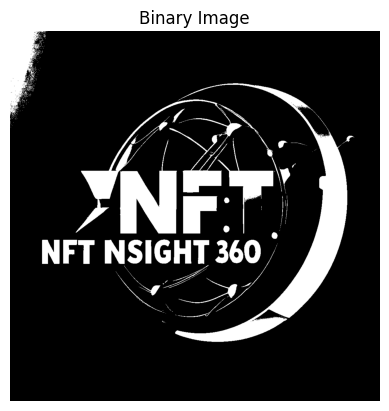

Black Pixel Area: 1081836


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/WhatsApp Image 2025-01-20 at 16.54.41.jpeg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

height, width, channels = image.shape
print(f"Image Size: {width}x{height}")
print(f"Total Pixels: {width * height}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# Black Pixel Area
black_pixels = np.sum(binary_image == 0)
print(f"Black Pixel Area: {black_pixels}")


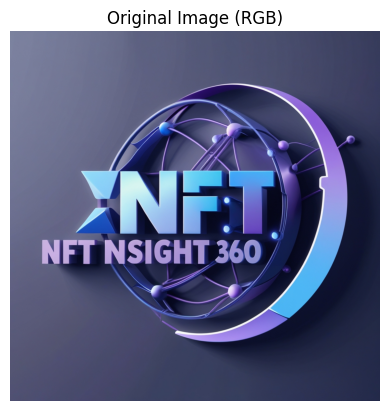

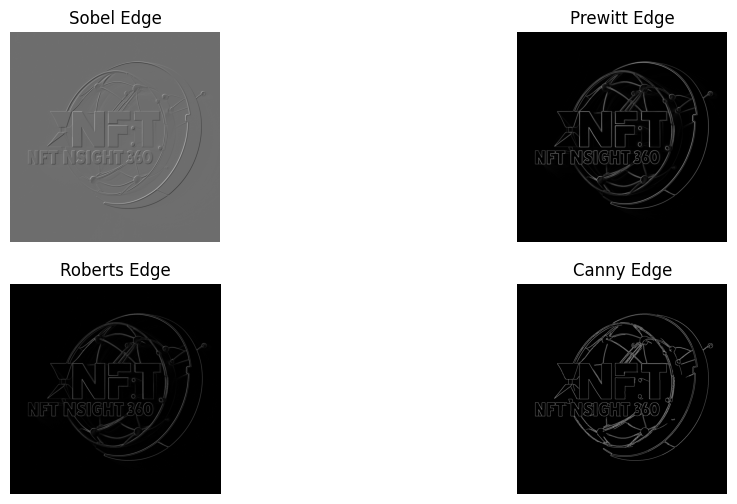

In [ ]:
from skimage.filters import prewitt, roberts

# Apply Sobel Filter
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = sobel_x + sobel_y

# Apply Prewitt Filter
prewitt_edges = prewitt(gray_image)

# Apply Roberts Cross Operator
roberts_edges = roberts(gray_image)

# Apply Canny Edge Detector
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display Edge Detection Results
edges = [sobel, prewitt_edges, roberts_edges, canny_edges]
titles = ["Sobel Edge", "Prewitt Edge", "Roberts Edge", "Canny Edge"]

plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(edges[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()


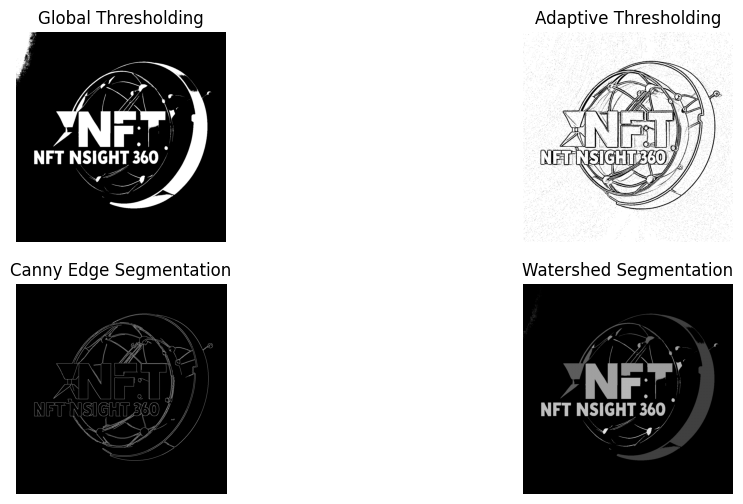

In [ ]:
from skimage.segmentation import watershed
from scipy import ndimage

# 1️⃣ Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# 2️⃣ Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# 3️⃣ Canny Edge Detection for Segmentation
edges = cv2.Canny(gray_image, 100, 200)

# 4️⃣ Watershed Algorithm for Region-Based Segmentation
distance_map = ndimage.distance_transform_edt(global_thresh)
markers, _ = ndimage.label(distance_map)
watershed_image = watershed(-distance_map, markers, mask=global_thresh)

# Display Segmentation Results
segmentations = [global_thresh, adaptive_thresh, edges, watershed_image]
titles = [
    "Global Thresholding",
    "Adaptive Thresholding",
    "Canny Edge Segmentation",
    "Watershed Segmentation",
]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(segmentations[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()
